Clifford N Jones
COMS 6500
Assignment  - Project

In [2]:
#Question 8 A

from scipy.integrate import solve_ivp
import numpy as np

# Define the ODE system based on the chemical reactions
def chemical_system(t, y, alpha, beta, gamma):
    y1, y2, y3 = y
    return [
        -alpha * y1 + beta * y2 * y3,     
        alpha * y1 - beta * y2 * y3 - gamma * y2**2,  
        gamma * y2**2 
    ]

# Parameters as given in the problem statement
alpha = 4e7
beta = 1e4
gamma = 3e7

# Initial conditions
y0 = [1, 0, 0]

# Time span for the integration
t_span = (0, 3)

# Experiment with various error tolerances
error_tolerances = [1e-3, 1e-6, 1e-9]

# Create a dictionary to store the results for each error tolerance
results = {}

# Integrate the system using the stiff method (BDF) for each error tolerance
for tol in error_tolerances:
    solution = solve_ivp(
        chemical_system, 
        t_span, 
        y0, 
        method='BDF', 
        rtol=tol, 
        atol=tol,  # Set the absolute tolerance similar to relative tolerance
        args=(alpha, beta, gamma),
        max_step=0.01,  # Limit the maximum step size
        dense_output=True  # Generate a continuous solution
    )
    results[tol] = solution

# The results dictionary contains the solutions for each specified tolerance
for tol, sol in results.items():
    print(f"Error Tolerance: {tol}")
    print(f"Number of Function Evaluations: {sol.nfev}")
    print(f"Solution at t=3: {sol.y[:, -1]}")
    print("-------------")


Error Tolerance: 0.001
Number of Function Evaluations: 1122
Solution at t=3: [5.79942557e-12 2.31977024e-08 9.99999977e-01]
-------------
Error Tolerance: 1e-06
Number of Function Evaluations: 1167
Solution at t=3: [2.80132387e-12 1.12052955e-08 9.99999989e-01]
-------------
Error Tolerance: 1e-09
Number of Function Evaluations: 2420
Solution at t=3: [2.77903184e-12 1.11161274e-08 9.99999989e-01]
-------------


Non stiff method

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
# We'll use the nonstiff method 'RK45' to integrate the chemical system ODEs with various error tolerances.

# First, define the ODE system as before
def chemical_system(t, y, alpha, beta, gamma):
    y1, y2, y3 = y
    return [
        -alpha * y1 + beta * y2 * y3,     # dy1/dt
        alpha * y1 - beta * y2 * y3 - gamma * y2**2,  # dy2/dt
        gamma * y2**2  # dy3/dt
    ]

# Parameters and initial conditions are the same as before
alpha = 4e7
beta = 1e4
gamma = 3e7
y0 = [1, 0, 0]
t_span = (0, 3)

# Using a nonstiff solver 'RK45' with various error tolerances
error_tolerances = [1e-3, 1e-6, 1e-9]
nonstiff_results = {}

# Integrate the system using the nonstiff method for each error tolerance
for tol in error_tolerances:
    nonstiff_solution = solve_ivp(
        chemical_system, 
        t_span, 
        y0, 
        method='RK45', 
        rtol=tol, 
        atol=tol,  # Absolute tolerance set similarly to relative tolerance
        args=(alpha, beta, gamma)
    )
    nonstiff_results[tol] = nonstiff_solution

# Print out the results for each error tolerance
for tol, sol in nonstiff_results.items():
    print(f"Error Tolerance: {tol}")
    print(f"Number of Function Evaluations: {sol.nfev}")
    print(f"Solution at t=3: {sol.y[:, -1]}")
    print("-------------")
#'sol.y[:, -1]' gives us the final value of y at the last time point


Error Tolerance: 0.001
Number of Function Evaluations: 256876286
Solution at t=3: [5.34539616e-04 1.39504794e-03 9.98070412e-01]
-------------
Error Tolerance: 1e-06
Number of Function Evaluations: 253775258
Solution at t=3: [1.52911054e-07 1.93099661e-06 9.99997916e-01]
-------------
Error Tolerance: 1e-09
Number of Function Evaluations: 253776176
Solution at t=3: [-2.66130505e-10  1.15127295e-08  9.99999989e-01]
-------------


Question 8 b (Lorenz Equation)

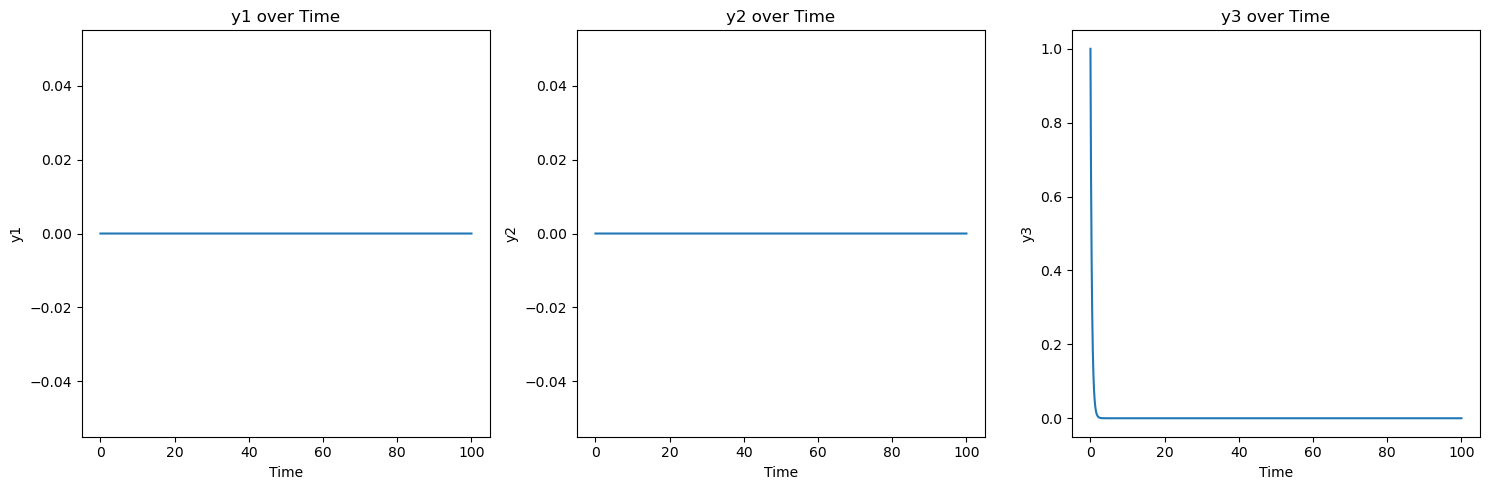

In [3]:
#plot the y's as function of t


from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0 = [0.0, 0.0, 1.0]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system
sol = solve_ivp(lorenz_system, t_span, y0, t_eval=t_eval)

# Plotting
plt.figure(figsize=(15, 5))

# y1 plot
plt.subplot(1, 3, 1)
plt.plot(sol.t, sol.y[0])
plt.title('y1 over Time')
plt.xlabel('Time')
plt.ylabel('y1')

# y2 plot
plt.subplot(1, 3, 2)
plt.plot(sol.t, sol.y[1])
plt.title('y2 over Time')
plt.xlabel('Time')
plt.ylabel('y2')

# y3 plot
plt.subplot(1, 3, 3)
plt.plot(sol.t, sol.y[2])
plt.title('y3 over Time')
plt.xlabel('Time')
plt.ylabel('y3')

plt.tight_layout()
plt.show()


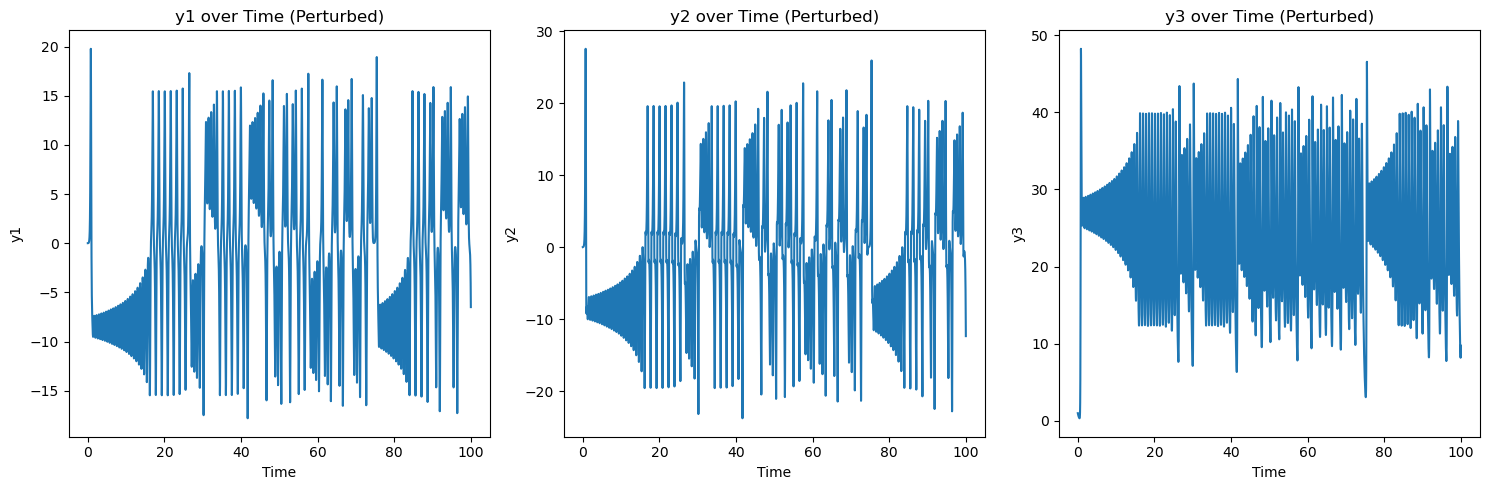

In [14]:

#plot the y's as function of t after tiny change of the initial condition (y1(0) = 0.01)

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Slightly perturbed initial conditions
y0_perturbed = [0.01, 0.0, 1.0]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system with the perturbed initial conditions
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)

# Plotting
plt.figure(figsize=(15, 5))

# y1 plot
plt.subplot(1, 3, 1)
plt.plot(sol_perturbed.t, sol_perturbed.y[0])
plt.title('y1 over Time (Perturbed)')
plt.xlabel('Time')
plt.ylabel('y1')

# y2 plot
plt.subplot(1, 3, 2)
plt.plot(sol_perturbed.t, sol_perturbed.y[1])
plt.title('y2 over Time (Perturbed)')
plt.xlabel('Time')
plt.ylabel('y2')

# y3 plot
plt.subplot(1, 3, 3)
plt.plot(sol_perturbed.t, sol_perturbed.y[2])
plt.title('y3 over Time (Perturbed)')
plt.xlabel('Time')
plt.ylabel('y3')

plt.tight_layout()
plt.show()


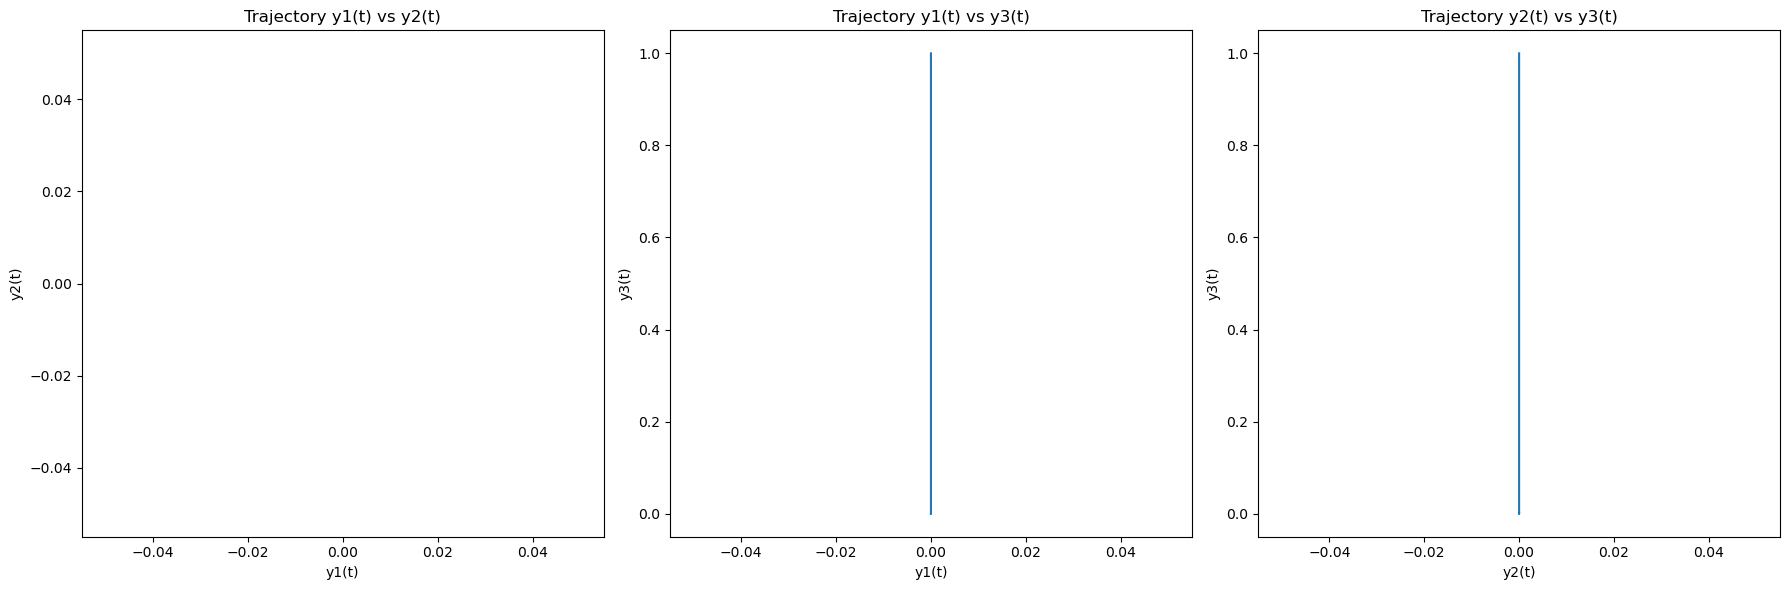

In [25]:
#plots of the trajectories before pertubation of the initial condition

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions from the original question
y0_original_question = [0.0, 0.0, 1.0]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system
sol = solve_ivp(lorenz_system, t_span, y0_original_question, t_eval=t_eval)

# Set up the figure for plotting phase space trajectories
plt.figure(figsize=(18, 6))

# Trajectory of y1 vs y2
plt.subplot(1, 3, 1)
plt.plot(sol.y[0], sol.y[1])
plt.title('Trajectory y1(t) vs y2(t)')
plt.xlabel('y1(t)')
plt.ylabel('y2(t)')

# Trajectory of y1 vs y3
plt.subplot(1, 3, 2)
plt.plot(sol.y[0], sol.y[2])
plt.title('Trajectory y1(t) vs y3(t)')
plt.xlabel('y1(t)')
plt.ylabel('y3(t)')

# Trajectory of y2 vs y3
plt.subplot(1, 3, 3)
plt.plot(sol.y[1], sol.y[2])
plt.title('Trajectory y2(t) vs y3(t)')
plt.xlabel('y2(t)')
plt.ylabel('y3(t)')

plt.tight_layout()
plt.show()


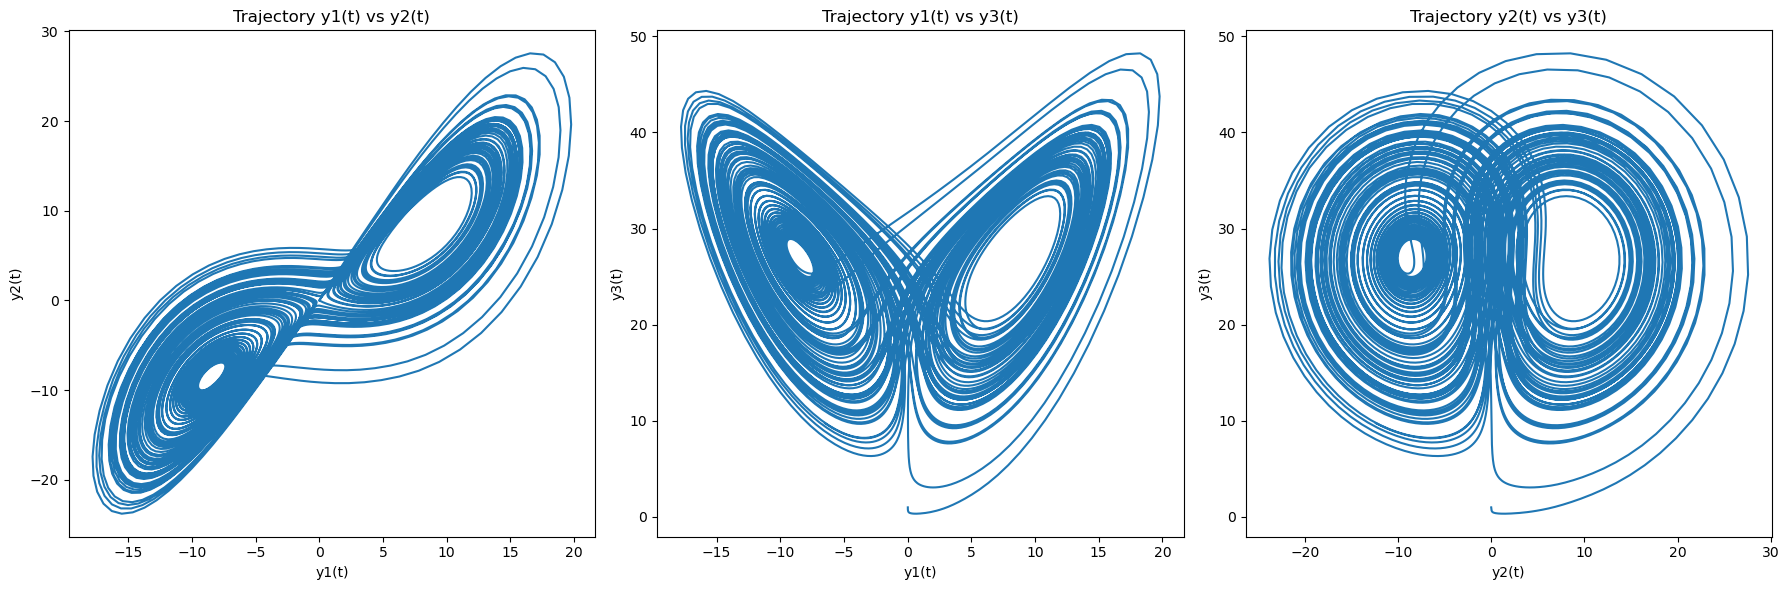

In [24]:
#plots of the trajectories after pertubation of the initial condition (Y1(0) = 0.01)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions from the original question
y0_original_question = [0.01, 0.0, 1.0]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system
sol = solve_ivp(lorenz_system, t_span, y0_original_question, t_eval=t_eval)

# Set up the figure for plotting phase space trajectories
plt.figure(figsize=(18, 6))

# Trajectory of y1 vs y2
plt.subplot(1, 3, 1)
plt.plot(sol.y[0], sol.y[1])
plt.title('Trajectory y1(t) vs y2(t)')
plt.xlabel('y1(t)')
plt.ylabel('y2(t)')

# Trajectory of y1 vs y3
plt.subplot(1, 3, 2)
plt.plot(sol.y[0], sol.y[2])
plt.title('Trajectory y1(t) vs y3(t)')
plt.xlabel('y1(t)')
plt.ylabel('y3(t)')

# Trajectory of y2 vs y3
plt.subplot(1, 3, 3)
plt.plot(sol.y[1], sol.y[2])
plt.title('Trajectory y2(t) vs y3(t)')
plt.xlabel('y2(t)')
plt.ylabel('y3(t)')

plt.tight_layout()
plt.show()


FURTHER ANALYSIS OF THE LORENZ SYSTEM 

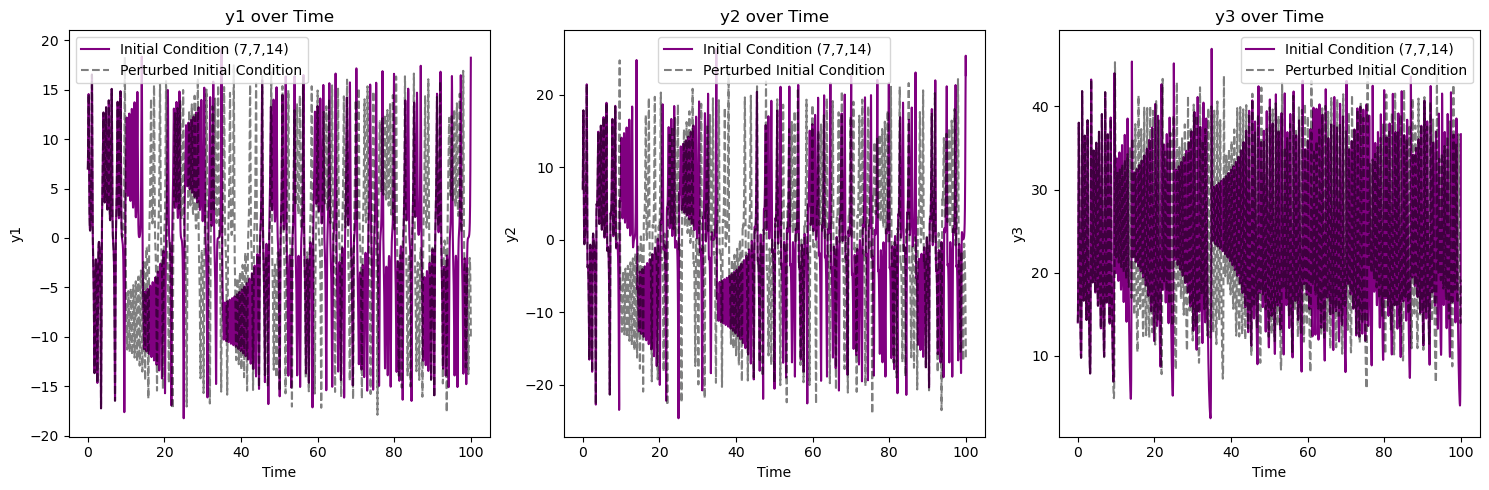

In [6]:
#REDO THE QUESTION AGAIN WITH DIFFERENT INITIAL VALUES,PLOT THE Y'S AND THE TRAJECTORIES COMBINED 
#FOR BETTER VISUALIZATION

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0_original = [7.0, 7.0, 14.0]
y0_perturbed = [7.00000000002, 7.00000000001, 14.000088]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system for the original initial conditions
sol_original = solve_ivp(lorenz_system, t_span, y0_original, t_eval=t_eval)

# Solve the Lorenz system for the perturbed initial conditions
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)


# Set up the figure for plotting
plt.figure(figsize=(15, 5))

# Plot y1 over time
plt.subplot(1, 3, 1)
plt.plot(sol_original.t, sol_original.y[0], label='Initial Condition (7,7,14)', color='purple')
plt.plot(sol_perturbed.t, sol_perturbed.y[0], 'k--', label='Perturbed Initial Condition', alpha=0.5)
plt.title('y1 over Time')
plt.xlabel('Time')
plt.ylabel('y1')
plt.legend()

# Plot y2 over time
plt.subplot(1, 3, 2)
plt.plot(sol_original.t, sol_original.y[1], label='Initial Condition (7,7,14)', color='purple')
plt.plot(sol_perturbed.t, sol_perturbed.y[1], 'k--', label='Perturbed Initial Condition', alpha=0.5)
plt.title('y2 over Time')
plt.xlabel('Time')
plt.ylabel('y2')
plt.legend()

# Plot y3 over time
plt.subplot(1, 3, 3)
plt.plot(sol_original.t, sol_original.y[2], label='Initial Condition (7,7,14)', color='purple')
plt.plot(sol_perturbed.t, sol_perturbed.y[2], 'k--', label='Perturbed Initial Condition', alpha=0.5)
plt.title('y3 over Time')
plt.xlabel('Time')
plt.ylabel('y3')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()



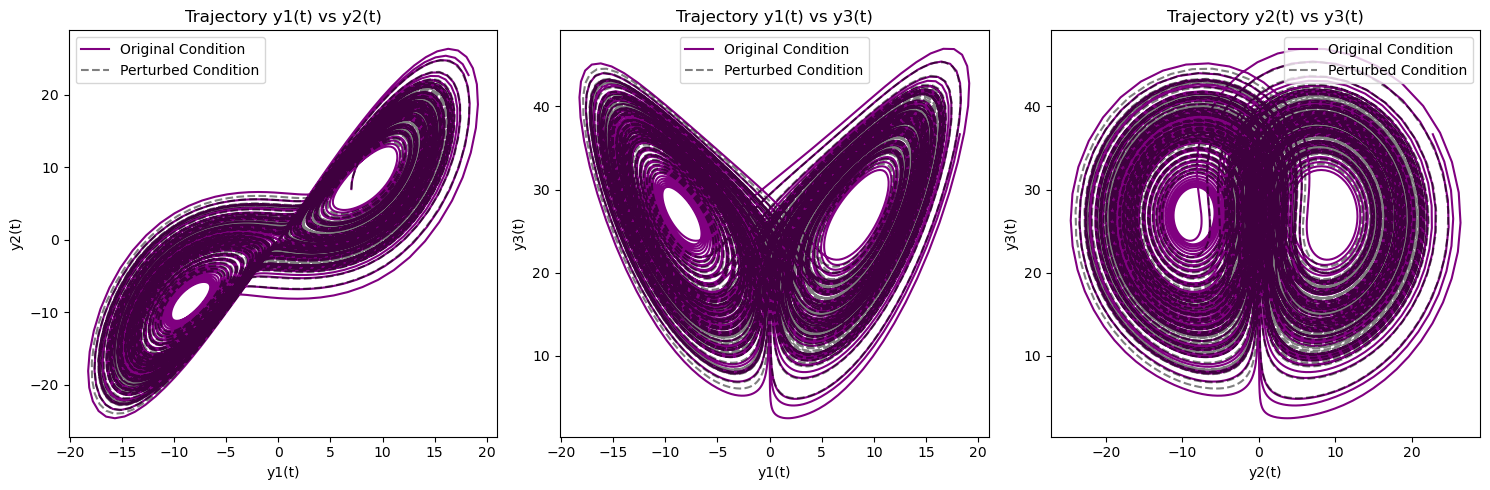

In [7]:
#PLOTS FOR THE TRAJECTORIES

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0_original = [7.0, 7.0, 14.0]
y0_perturbed = [7.00000000002, 7.00000000001, 14.000088]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system for the original initial conditions
sol_original = solve_ivp(lorenz_system, t_span, y0_original, t_eval=t_eval)

# Solve the Lorenz system for the perturbed initial conditions
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)
# Plotting the trajectories in the phase space
plt.figure(figsize=(15, 5))

# Trajectory of y1 vs y2
plt.subplot(1, 3, 1)
plt.plot(sol_original.y[0], sol_original.y[1], label='Original Condition', color='purple')
plt.plot(sol_perturbed.y[0], sol_perturbed.y[1], 'k--', label='Perturbed Condition', alpha=0.5)
plt.title('Trajectory y1(t) vs y2(t)')
plt.xlabel('y1(t)')
plt.ylabel('y2(t)')
plt.legend()

# Trajectory of y1 vs y3
plt.subplot(1, 3, 2)
plt.plot(sol_original.y[0], sol_original.y[2], label='Original Condition', color='purple')
plt.plot(sol_perturbed.y[0], sol_perturbed.y[2], 'k--', label='Perturbed Condition', alpha=0.5)
plt.title('Trajectory y1(t) vs y3(t)')
plt.xlabel('y1(t)')
plt.ylabel('y3(t)')
plt.legend()

# Trajectory of y2 vs y3
plt.subplot(1, 3, 3)
plt.plot(sol_original.y[1], sol_original.y[2], label='Original Condition', color='purple')
plt.plot(sol_perturbed.y[1], sol_perturbed.y[2], 'k--', label='Perturbed Condition', alpha=0.5)
plt.title('Trajectory y2(t) vs y3(t)')
plt.xlabel('y2(t)')
plt.ylabel('y3(t)')
plt.legend()

plt.tight_layout()
plt.show()


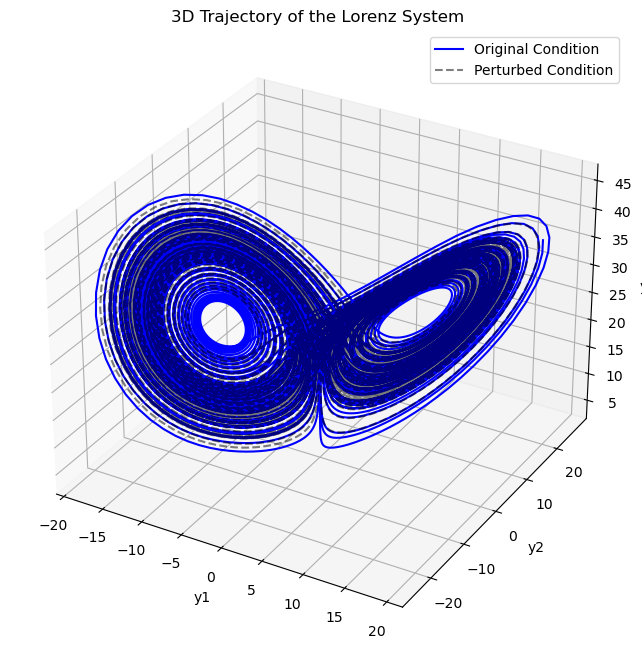

In [8]:
#3D VERSION OF THE PLOTS


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0_original = [7.0, 7.0, 14.0]
y0_perturbed = [7.00000000002, 7.00000000001, 14.000088]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # More points for a smoother plot

# Solve the Lorenz system for the original initial conditions
sol_original = solve_ivp(lorenz_system, t_span, y0_original, t_eval=t_eval)

# Solve the Lorenz system for the perturbed initial conditions
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)

# Plotting the trajectories in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original trajectory
ax.plot(sol_original.y[0], sol_original.y[1], sol_original.y[2], label='Original Condition', color='blue')

# Plot the perturbed trajectory
ax.plot(sol_perturbed.y[0], sol_perturbed.y[1], sol_perturbed.y[2], 'k--', label='Perturbed Condition', alpha=0.5)

# Set labels and title
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')
ax.set_title('3D Trajectory of the Lorenz System')

# Add a legend
ax.legend()

# Show the plot
plt.show()


/var/folders/w8/7pnjpkg97y32n799qyp_7hqr0000gn/T/ipykernel_98988/3856710423.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(sol_original.y[0], sol_original.y[1], sol_original.y[2], c=colors, cmap='viridis', s=1)
/var/folders/w8/7pnjpkg97y32n799qyp_7hqr0000gn/T/ipykernel_98988/3856710423.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(sol_perturbed.y[0], sol_perturbed.y[1], sol_perturbed.y[2], c=colors, cmap='viridis', s=1, alpha=0.5)
/var/folders/w8/7pnjpkg97y32n799qyp_7hqr0000gn/T/ipykernel_98988/3856710423.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable, label='Time')


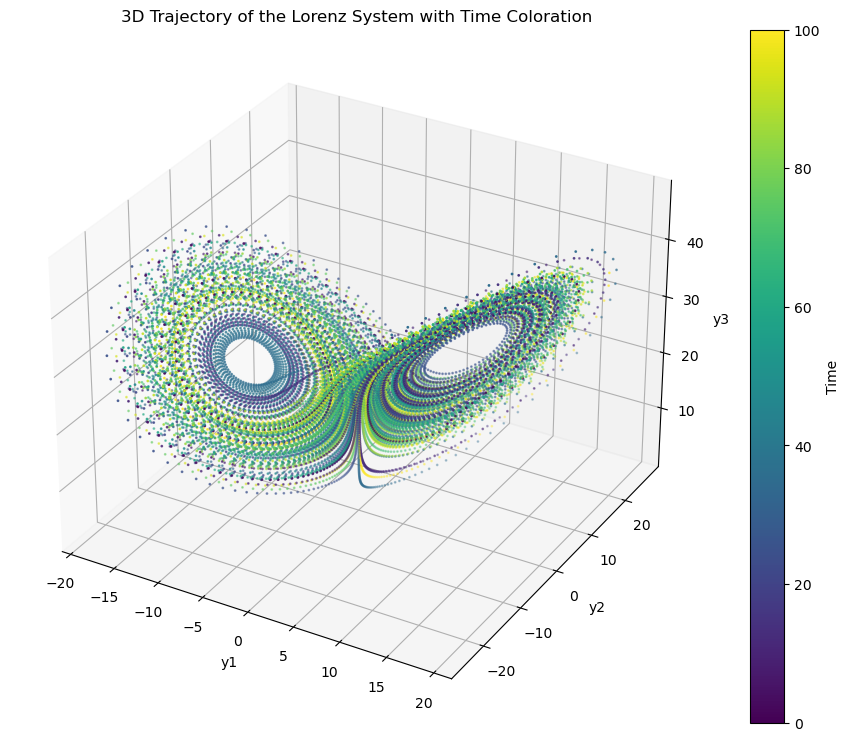

In [9]:
#3D VERSION OF THE PLOTS WITH TIME COLORATION


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import numpy as np

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0_original = [7.0, 7.0, 14.0]
y0_perturbed = [7.00000000002, 7.00000000001, 14.000088]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the Lorenz system for the original initial conditions
sol_original = solve_ivp(lorenz_system, t_span, y0_original, t_eval=t_eval)

# Solve the Lorenz system for the perturbed initial conditions
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on time
colors = plt.cm.viridis(np.linspace(0, 1, sol_original.t.size))

# Plot the original trajectory with color change
ax.scatter(sol_original.y[0], sol_original.y[1], sol_original.y[2], c=colors, cmap='viridis', s=1)

# Plot the perturbed trajectory with color change
ax.scatter(sol_perturbed.y[0], sol_perturbed.y[1], sol_perturbed.y[2], c=colors, cmap='viridis', s=1, alpha=0.5)

# Set labels and title
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')
ax.set_title('3D Trajectory of the Lorenz System with Time Coloration')

# Show color bar
mappable = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=sol_original.t.min(), vmax=sol_original.t.max()))
mappable.set_array(sol_original.t)
plt.colorbar(mappable, label='Time')

# Show the plot
plt.show()


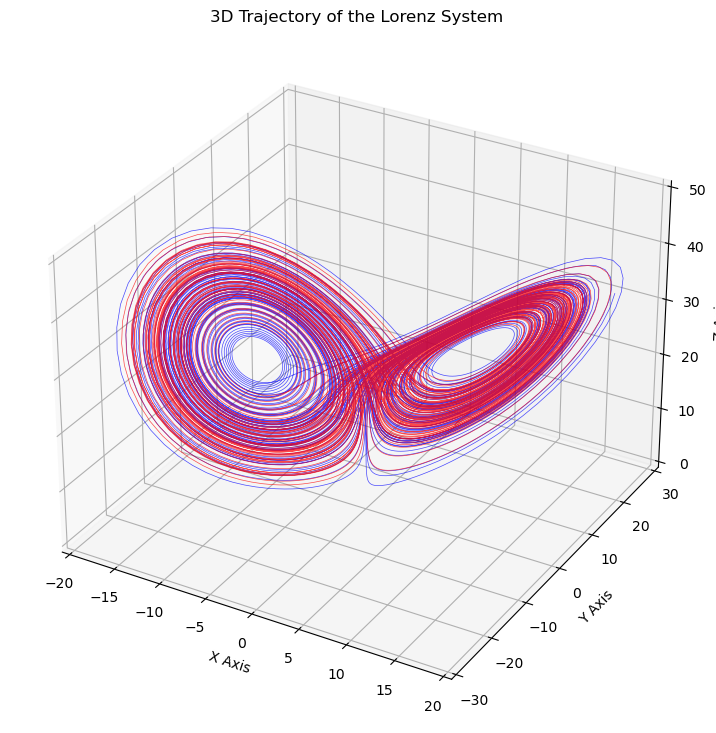

In [11]:
#Further analysis Animation code (Lorenz system )

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib.animation import FuncAnimation

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Lorenz system of ODEs
def lorenz_system(t, Y):
    y1, y2, y3 = Y
    dy1dt = sigma * (y2 - y1)
    dy2dt = y1 * (rho - y3) - y2
    dy3dt = y1 * y2 - beta * y3
    return [dy1dt, dy2dt, dy3dt]

# Initial conditions
y0_original = [7.0, 7.0, 14.0]
y0_perturbed = [7.00000000002, 7.00000000001, 14.000088]

# Time span
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the Lorenz system
sol_original = solve_ivp(lorenz_system, t_span, y0_original, t_eval=t_eval)
sol_perturbed = solve_ivp(lorenz_system, t_span, y0_perturbed, t_eval=t_eval)

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

# Plotting lines instead of scatter
line_original, = ax.plot(sol_original.y[0], sol_original.y[1], sol_original.y[2], color='blue', linewidth=0.5, alpha=0.7)
line_perturbed, = ax.plot(sol_perturbed.y[0], sol_perturbed.y[1], sol_perturbed.y[2], color='red', linewidth=0.5, alpha=0.7)

# Set the axes limits and labels
ax.set_xlim([-20, 20])
ax.set_ylim([-30, 30])
ax.set_zlim([0, 50])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Trajectory of the Lorenz System')

# Animation update function
def update(num, line_original, line_perturbed):
    line_original.set_data(sol_original.y[0:2, :num])
    line_original.set_3d_properties(sol_original.y[2, :num])
    
    line_perturbed.set_data(sol_perturbed.y[0:2, :num])
    line_perturbed.set_3d_properties(sol_perturbed.y[2, :num])
    
    return line_original, line_perturbed

# Create the animation
ani = FuncAnimation(fig, update, frames=len(sol_original.t), interval=30, fargs=(line_original, line_perturbed), blit=False)

# Save the animation
ani.save('lorenz_attractor_animation.mp4', writer='ffmpeg')

plt.show()
